<a href="https://colab.research.google.com/github/lambdabypi/AppliedGenAIIE5374/blob/main/M3_Lab1_Prompting_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Intro Section -->
<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 30px; border-radius: 12px; text-align: center; box-shadow: 0 4px 12px rgba(0,0,0,0.1);">
    <h1 style="margin-bottom: 10px; font-size: 32px;">Introduction to Prompting Strategies</h1>
    <p style="font-size: 18px; margin: 0;">Instructor: <strong>Dr. Dehghani</strong></p>
</div>

<!-- Spacer -->
<div style="height: 30px;"></div>

<!-- Why It Matters Section -->
<div style="background: #ffffff; padding: 25px; border-radius: 10px; border-left: 6px solid #0055d4; box-shadow: 0 4px 8px rgba(0,0,0,0.05);">
    <h2 style="margin-top: 0; color: #001a70;">Why Prompting Strategies Matter</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        Imagine you’re working with a junior engineer. You say:  
        <em>“Optimize the system.”</em><br>
        They’ll probably ask: <em>“Which system? Optimize for cost, speed, or energy? Any constraints?”</em> 🧐
    </p>
    <p style="font-size: 16px; line-height: 1.6;">
        Now try this instead:  
        <em>“Analyze the HVAC system and minimize energy consumption while keeping temperatures between 22-24°C. Provide a cost breakdown.”</em>  
    </p>
    <p style="font-size: 16px; line-height: 1.6;">
        That’s not just a prompt—it’s a <strong>clear strategy</strong> with defined objectives and boundaries.
        And that’s exactly what AI models need to perform at their best.
    </p>
</div>

<!-- Tip Section -->
<div style="background: #f5faff; padding: 20px; border-radius: 8px; border-left: 5px solid #0055d4; margin-top: 30px;">
    <h3 style="margin-top: 0; color: #0055d4;">💡 Pro Tip</h3>
    <p style="margin: 0; font-size: 16px; line-height: 1.6;">
        AI models appreciate well-structured instructions just like engineers appreciate complete design specs.
        Be specific, set clear goals, and watch the results improve!
    </p>
</div>

<!-- Upcoming Topics -->
<div style="margin-top: 40px; text-align: center;">
    <h3 style="color: #001a70;">What’s Ahead</h3>
    <ul style="list-style: none; padding: 0; font-size: 16px; line-height: 1.8;">
        <li>📚 Basic Prompting Types</li>
        <li>🧩 Advanced Strategies</li>
        <li>📊 Application-Specific Techniques</li>
    </ul>
    <p style="font-size: 16px; color: #333;">Let’s engineer some powerful AI conversations! 🛠️</p>
</div>


<!-- Section Header -->
<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; border-radius: 12px; text-align: center; box-shadow: 0 4px 12px rgba(0,0,0,0.1);">
    <h1 style="margin-bottom: 10px; font-size: 30px;">📚 Basic Prompting Types</h1>
</div>

<!-- Spacer -->
<div style="height: 25px;"></div>

<!-- Zero-Shot Prompting -->
<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-bottom: 20px;">
    <h3 style="margin-top: 0; color: #001a70;">1️⃣ Zero-Shot Prompting</h3>
    <p style="font-size: 16px; line-height: 1.6;">
        Provide only the task without any examples.  
        <strong>Use When:</strong> The task is simple and well-known by the model.  
        <em>Example:</em> “Translate 'Hello' to French.”
    </p>
</div>


In [3]:
# ==========================
# 📌 Set Up LLM and OpenAI API
# ==========================
# Import required libraries
from google.colab import userdata
import openai
import os

# Load the OpenAI API key securely from Colab secrets
api_key = userdata.get('OPENAI_API_KEY')

# Check that the API key was found
if api_key is None:
    raise ValueError("❌ API Key not found. Please store your OpenAI API key using Colab secrets.")

# Set API key as environment variable for OpenAI
os.environ["OPENAI_API_KEY"] = api_key

# Initialize OpenAI client
client = openai.OpenAI(api_key=api_key)

print("✅ OpenAI API Key successfully loaded and environment is ready!")

# ==========================
# 📌 Set LLM Model to GPT-3.5
# ==========================
# Define which LLM model to use
model_name = "gpt-3.5-turbo"

print(f"✅ LLM model set to: {model_name}")


✅ OpenAI API Key successfully loaded and environment is ready!
✅ LLM model set to: gpt-3.5-turbo


In [4]:
# ==========================
# 📌 Zero-Shot Test: Hidden Formula Sequence
# ==========================

hard_sequence_prompt_zero = (
    "The sequence is: 3, 12, 27, 48, 75, ___. What’s next?"
)

response_zero_hard = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": hard_sequence_prompt_zero}],
    temperature=0
)

print("🔹 LLM Response (Zero-Shot - Hard Sequence):\n")
print(response_zero_hard.choices[0].message.content.strip())


🔹 LLM Response (Zero-Shot - Hard Sequence):

The pattern in the sequence is adding consecutive odd numbers to the previous number. 

3 + 9 = 12
12 + 15 = 27
27 + 21 = 48
48 + 27 = 75

Therefore, the next number in the sequence would be 75 + 33 = 108. 

So, the next number in the sequence is 108.



<!-- One-Shot Prompting -->
<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-bottom: 20px;">
    <h3 style="margin-top: 0; color: #001a70;">2️⃣ One-Shot Prompting</h3>
    <p style="font-size: 16px; line-height: 1.6;">
        Provide one clear example along with the instruction.  
        <strong>Use When:</strong> You want to guide the model’s behavior with a single example.  
        <em>Example:</em> “Translate 'Hello' to French: Bonjour. Now translate 'Goodbye'.”
    </p>
</div>


In [5]:
# ==========================
# 📌 Zero-Shot vs One-Shot Comparison: Alternating Pattern Sequence (Correct One-Shot)
# ==========================

model_name = "gpt-3.5-turbo"

# Zero-Shot Prompt (No Example)
zero_shot_prompt = (
    "The sequence is: 1, 4, 2, 9, 3, 16, 4, ___. What number should replace the blank?"
)

# One-Shot Prompt (One Example + New Question)
one_shot_prompt = (
    "Example:\n"
    "The sequence is: 1, 1, 2, 4, 3, 9, ___. What’s next?\n"
    "Answer: 4.\n\n"
    "Now solve this one:\n"
    "The sequence is: 1, 4, 2, 9, 3, 16, 4, ___. What number should replace the blank?"
)

# Run Zero-Shot
response_zero = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": zero_shot_prompt}],
    temperature=0
)

# Run One-Shot
response_one = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": one_shot_prompt}],
    temperature=0
)

# Display Results
print("🔹 Zero-Shot Response:\n" + "-"*40)
print(response_zero.choices[0].message.content.strip())

print("\n\n🔹 One-Shot Response:\n" + "-"*40)
print(response_one.choices[0].message.content.strip())


🔹 Zero-Shot Response:
----------------------------------------
The pattern is: 

1^2 = 1
2^2 = 4
3^2 = 9
4^2 = 16

Therefore, the next number in the sequence should be 5^2 = 25. 

So, the number that should replace the blank is 25.


🔹 One-Shot Response:
----------------------------------------
Answer: 25.



<!-- Few-Shot Prompting -->
<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-bottom: 20px;">
    <h3 style="margin-top: 0; color: #001a70;">3️⃣ Few-Shot Prompting</h3>
    <p style="font-size: 16px; line-height: 1.6;">
        Provide multiple examples to clearly demonstrate the pattern.  
        <strong>Use When:</strong> The task is complex or requires understanding a specific format.  
        <em>Example:</em>  
        - “Translate 'Hello' to French: Bonjour.”  
        - “Translate 'Goodbye' to French: Au revoir.”  
        - “Translate 'Thank you' to French: Merci.”  
        Now translate 'Good night'.
    </p>
</div>

<!-- Spacer -->
<div style="height: 30px;"></div>

<!-- Closing Tip -->
<div style="background: #f5faff; padding: 20px; border-radius: 8px; border-left: 5px solid #0055d4;">
    <h3 style="margin-top: 0; color: #0055d4;">💡 Quick Reminder</h3>
    <p style="margin: 0; font-size: 16px; line-height: 1.6;">
        The more complex the task, the more examples you should provide. But remember, too many examples can make prompts bulky and inefficient.
    </p>
</div>



In [6]:
# ==========================
# 📌 Few-Shot Prompting Example: Ultra-Hard Pattern (3 Hidden Rules)
# ==========================

model_name = "gpt-4-turbo"  # Best for complex reasoning

# Few-Shot Prompt with 2 Examples
few_shot_prompt = (
    "Example 1:\n"
    "The sequence is: 1, 1, 2, 4, 3, 9, ___. What’s next?\n"
    "Answer: 4.\n\n"
    "Example 2:\n"
    "The sequence is: 1, 1, 2, 4, 4, 9, 7, 16, ___. What’s next?\n"
    "Answer: 11.\n\n"
    "Now try this one:\n"
    "The sequence is: 1, 1, 2, 4, 4, 9, 7, 16, 11, ___, 16, 36. What number should replace the blank?"
)

# Run Few-Shot Prompt
response_few = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": few_shot_prompt}],
    temperature=0
)

# Display Result
print("🔹 Few-Shot Prompting (Two Examples Provided):")
print("-" * 40)
print(response_few.choices[0].message.content.strip())


🔹 Few-Shot Prompting (Two Examples Provided):
----------------------------------------
To solve this sequence, let's analyze the pattern based on the given numbers and the answers from the previous examples:

1, 1, 2, 4, 4, 9, 7, 16, 11, ___, 16, 36.

From the previous examples:
- Example 1: 1, 1, 2, 4, 3, 9, 4
- Example 2: 1, 1, 2, 4, 4, 9, 7, 16, 11

We can observe that the sequence seems to alternate between two patterns:
1. Squares of integers.
2. A sequence that increases by a certain rule.

Let's break it down:
- 1 (square of 1)
- 1 (square of 1)
- 2 (square of 1 + 1)
- 4 (square of 2)
- 4 (square of 2)
- 9 (square of 3)
- 7 (square of 2 + 3)
- 16 (square of 4)
- 11 (square of 3 + 2)
- ___
- 16 (square of 4)
- 36 (square of 6)

To find the missing number, we need to see if there's a pattern in the non-square numbers:
- 2 (1 + 1)
- 7 (4 + 3)
- 11 (9 + 2)

It seems that the non-square numbers are derived by adding the square root of the previous square number and another number tha

## 🧠 Advanced Prompting Techniques  

Moving beyond basic prompting methods like zero-shot and few-shot, advanced strategies help enhance the reasoning and adaptability of large language models (LLMs). These techniques guide the model's thought process to handle complex tasks more effectively.

---

### 🔗 Chain-of-Thought (CoT) Prompting  

Chain-of-Thought prompting encourages models to **explain their intermediate reasoning steps**, leading to more transparent and accurate conclusions. By structuring prompts to include logical steps, CoT improves the model’s ability to solve complex reasoning tasks.

**Why is CoT Important?**  
- ✔️ Improves performance on multi-step reasoning tasks.  
- ✔️ Helps produce logically structured and coherent responses.  
- ✔️ Breaks down complex problems into manageable steps.

📖 **Reference:** [Chain-of-Thought Prompting Elicits Reasoning in Large Language Models](https://arxiv.org/abs/2201.11903)

---

*Next, explore practical examples of Chain-of-Thought prompting.*


In [7]:
# ==========================
# 📌 Chain-of-Thought Demonstration: Make 110 with Five 5's
# ==========================

model_name = "gpt-4-turbo"

# Zero-Shot Prompt (No Reasoning Encouraged)
zero_shot_prompt = (
    "Use exactly five 5’s and only four operations (+, -, *, /) and parentheses to make 110."
)

# Chain-of-Thought Prompt (Encourages Step-by-Step Reasoning)
cot_prompt = (
    "Let's solve this step by step.\n"
    "We need to use exactly five 5’s and only four operations (+, -, *, /) and parentheses to make 110.\n"
    "Step 1: Think about how we can combine the 5's to form larger numbers (e.g., 55).\n"
    "Step 2: Try to combine them logically to reach 110.\n"
    "Now, provide the final equation and the answer."
)

# Run Zero-Shot
response_zero = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": zero_shot_prompt}],
    temperature=0
)

# Run Chain-of-Thought
response_cot = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": cot_prompt}],
    temperature=0
)

# Display Results
print("🔹 Zero-Shot Response (No Reasoning Encouraged):\n" + "-" * 50)
print(response_zero.choices[0].message.content.strip())

print("\n🔹 Chain-of-Thought Response (Reasoning Encouraged):\n" + "-" * 50)
print(response_cot.choices[0].message.content.strip())


🔹 Zero-Shot Response (No Reasoning Encouraged):
--------------------------------------------------
To achieve the number 110 using exactly five 5's and the operations (+, -, *, /) along with parentheses, you can arrange them as follows:

\[ 5 * (5 * 5 - 5) + 5 = 110 \]

Here's the breakdown:
1. \(5 * 5 = 25\)
2. \(25 - 5 = 20\)
3. \(5 * 20 = 100\)
4. \(100 + 5 = 105\)
5. \(105 + 5 = 110\)

Thus, \(5 * (5 * 5 - 5) + 5 = 110\).

🔹 Chain-of-Thought Response (Reasoning Encouraged):
--------------------------------------------------
To solve this, let's follow the steps you outlined:

Step 1: Consider how to combine the 5's to form larger numbers. One way to do this is to create the number 55 by combining two 5's.

Step 2: Now, let's try to use the remaining three 5's along with the number 55 to reach 110.

Here's one way to do it:
- Use two 5's to make 55.
- Use another two 5's to make another 55.
- Now, add these two 55's together.

The equation would be:
55 + 55 = 110

However, this uses

# ✋ Hands-On Experiment: Observations  

📌 **Instructions:**  
- Run your experiments by changing the model type (e.g., `gpt-3.5-turbo`, `gpt-4-turbo`, `gpt-o3`), temperature, and prompt style.  
- You can **either attach a screenshot/image of your results** or **write a brief summary of your observations (max half a page)**.

---

- **Model Used:**  
  _[Enter the model name you tried, e.g., gpt-3.5-turbo, gpt-4-turbo, or gpt-o3]_

- **Temperature Setting:**  
  _[Enter the temperature you used, e.g., 0.0, 0.5, 0.7]_

- **Zero-Shot Result:**  
  _[Did Zero-Shot solve the problem correctly? Yes/No. Add a short explanation or attach an image.]_

- **Chain-of-Thought Result:**  
  _[Did Chain-of-Thought solve the problem better? Yes/No. Add a short explanation or attach an image.]_

- **Key Takeaways (Max Half Page or Screenshot):**  
  _[Summarize what you observed. Did a specific model perform better? How did temperature affect the results? What worked best? Attach image or write here.]_

---

✍️ *Try at least two models and different temperatures. Compare the results and reflect on how prompting strategies influence performance!*


In [9]:
# ==========================
# 📌 Chain-of-Thought Demonstration: Make 110 with Five 5's using gpt-3.5-turbo
# ==========================

model_name = "gpt-3.5-turbo"

# Zero-Shot Prompt (No Reasoning Encouraged)
zero_shot_prompt = (
    "Use exactly five 5’s and only four operations (+, -, *, /) and parentheses to make 110."
)

# Chain-of-Thought Prompt (Encourages Step-by-Step Reasoning)
cot_prompt = (
    "Let's solve this step by step.\n"
    "We need to use exactly five 5’s and only four operations (+, -, *, /) and parentheses to make 110.\n"
    "Step 1: Think about how we can combine the 5's to form larger numbers (e.g., 55).\n"
    "Step 2: Try to combine them logically to reach 110.\n"
    "Now, provide the final equation and the answer."
)

# Run Zero-Shot
response_zero = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": zero_shot_prompt}],
    temperature=0
)

# Run Chain-of-Thought
response_cot = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": cot_prompt}],
    temperature=0
)

# Display Results
print("🔹 Zero-Shot Response (No Reasoning Encouraged):\n" + "-" * 50)
print(response_zero.choices[0].message.content.strip())

print("\n🔹 Chain-of-Thought Response (Reasoning Encouraged):\n" + "-" * 50)
print(response_cot.choices[0].message.content.strip())


🔹 Zero-Shot Response (No Reasoning Encouraged):
--------------------------------------------------
(5 * 5) + (5 * 5) + 5 = 110

🔹 Chain-of-Thought Response (Reasoning Encouraged):
--------------------------------------------------
Sure! Here's one way to reach 110 using five 5's:

(5 * 5) + (5 * 5) + 5 = 110

So, the final equation is (5 * 5) + (5 * 5) + 5 = 110, and the answer is 110.


# Chain-of-Thought Prompting Experiment Results

**Model Used:** GPT-4-Turbo and GPT-3.5-Turbo  
**Temperature Setting:** 0.0

## Key Observations

I ran experiments comparing zero-shot vs. chain-of-thought (CoT) prompting on two OpenAI models to solve the "make 110 with five 5's" problem. The results show interesting differences in reasoning capabilities and prompt responsiveness.

GPT-3.5-Turbo produced identical solutions in both conditions: `(5 * 5) + (5 * 5) + 5 = 110`. Despite being prompted to show its work in the CoT condition, the model only added a brief introductory sentence before providing the same answer. This suggests limited benefit from explicit reasoning prompts with this model for this particular task.

GPT-4-Turbo, however, demonstrated significant differences between conditions. In zero-shot, it provided `5 * (5 * 5 - 5) + 5 = 110` with a detailed breakdown of each step. In the CoT condition, it explored a completely different solution path, leading to `55 + 55 - 5 + 5 = 110` while explicitly tracking how it combined the digits.

What's particularly interesting is that GPT-4 exhibited emergent reasoning abilities even without explicit prompting. It voluntarily provided step-by-step explanations in the zero-shot condition despite not being asked to show its work.

The experiment highlights that model quality seems to be the primary factor in determining whether reasoning prompts are effective. For GPT-3.5, CoT prompting added minimal value, while for GPT-4, it encouraged exploration of alternative solution paths.

These findings suggest that as models become more capable, they may benefit more from explicit reasoning prompts, though the strongest models might already employ reasoning internally regardless of prompting strategy.

## 🔁 Self-Consistency Prompting

While Chain-of-Thought (CoT) improves reasoning by encouraging step-by-step thinking, it may still produce **inconsistent or incorrect** answers, especially in complex scenarios.  
**Self-Consistency Prompting** enhances CoT by asking the model to **generate multiple reasoning paths** and then select the most common or consistent final answer.

### Why is Self-Consistency Useful?

- ✅ Reduces random reasoning errors.
- ✅ Boosts reliability on ambiguous or multi-path problems.
- ✅ Often improves performance on mathematical, logical, and symbolic tasks.

📖 **Reference**: [Self-Consistency Improves Chain of Thought Reasoning in Language Models](https://arxiv.org/abs/2203.11171)

---

*Next, we’ll see how Self-Consistency works in action using a complex reasoning example.*


In [8]:
# ==========================
# 📌 Comparing Chain-of-Thought vs. Self-Consistency Prompting
# ==========================

model_name = "gpt-4-turbo"  # Using GPT-4 for better reasoning

# Define the problem prompt
problem_prompt = (
    "If a train travels at 60 miles per hour and leaves at 2 PM, and another train leaves "
    "the same station at 3 PM traveling at 90 miles per hour, when will the second train catch up to the first?"
)

# Chain-of-Thought Prompt (Standard)
cot_prompt = (
    "Let's solve this step by step.\n"
    + problem_prompt
)

# Self-Consistency Prompt: Ask the model to produce multiple reasoning paths
def run_self_consistency(prompt, num_attempts=5):
    answers = []
    for _ in range(num_attempts):
        response = client.chat.completions.create(
            model=model_name,
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7  # Add randomness to explore different reasoning paths
        )
        answer = response.choices[0].message.content.strip()
        answers.append(answer)
    return answers

# Run Chain-of-Thought (Single Attempt)
response_cot = client.chat.completions.create(
    model=model_name,
    messages=[{"role": "user", "content": cot_prompt}],
    temperature=0
)
cot_answer = response_cot.choices[0].message.content.strip()

# Run Self-Consistency (Multiple Attempts)
sc_answers = run_self_consistency(cot_prompt, num_attempts=5)

# Simple Majority Vote to Find Most Consistent Answer
from collections import Counter
most_common_answer = Counter(sc_answers).most_common(1)[0]

# Display Results
print("🔹 Chain-of-Thought Response (Single Attempt):\n" + "-" * 50)
print(cot_answer)

print("\n🔹 Self-Consistency Responses (Multiple Attempts):\n" + "-" * 50)
for idx, ans in enumerate(sc_answers, 1):
    print(f"Attempt {idx}: {ans}")

print("\n🔹 Final Self-Consistency Selected Answer:\n" + "-" * 50)
print(f"Most Common Answer: {most_common_answer[0]}\nAppeared {most_common_answer[1]} times.")


🔹 Chain-of-Thought Response (Single Attempt):
--------------------------------------------------
To find out when the second train will catch up to the first, we can start by calculating how far ahead the first train is when the second train starts.

1. **Calculate the distance the first train travels in one hour:**
   Since the first train leaves at 2 PM and travels at 60 miles per hour, by 3 PM (when the second train leaves), the first train will have traveled:
   \[
   \text{Distance} = \text{Speed} \times \text{Time} = 60 \text{ miles per hour} \times 1 \text{ hour} = 60 \text{ miles}
   \]

2. **Set up an equation to find when the second train catches up:**
   Let \( t \) be the time in hours after 3 PM when the second train catches up to the first. At this time, both trains will have covered the same distance from the station.

   - The first train's distance from the station at time \( t \) after 3 PM is:
     \[
     \text{Distance}_{\text{first}} = 60 \text{ miles} + 60 \text{

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; border-radius: 12px; text-align: center;">
    <h1 style="margin-bottom: 10px;">📚 Exploring More Advanced Prompting Strategies</h1>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-top: 20px;">
    <ul style="font-size: 16px; line-height: 1.8;">
        <li><strong>🧩 Tree-of-Thought (ToT) Prompting:</strong> Explores multiple reasoning paths like a decision tree, helping the model evaluate and compare various solutions before choosing the best one.</li>
        <li><strong>🤖 ReAct (Reasoning and Acting) Prompting:</strong> Combines reasoning steps with actions, including API calls or external tool usage. Ideal for interactive agents and dynamic decision-making tasks.</li>
        <li><strong>🔄 Reflexion Prompting:</strong> Encourages the model to critique its own responses and iteratively improve them, simulating self-correction and learning.</li>
    </ul>
</div>

<div style="margin-top: 40px; text-align: center;">
    <h2 style="color: #001a70;">✋ Hands-On Task: Compare Prompting Strategies</h2>
</div>

<div style="background: #f5faff; padding: 20px; border-radius: 8px; border-left: 5px solid #0055d4;">
    <p style="font-size: 16px;">
        📌 <strong>Task Instructions:</strong><br>
        - Experiment with <strong>Self-Consistency</strong>, <strong>Tree-of-Thought</strong>, and <strong>ReAct</strong> prompting methods.<br>
        - Try to solve the following problem using each method and compare the results.
    </p>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-top: 20px;">
    <h3>🧠 <strong>Challenge Problem:</strong></h3>
    <p style="font-size: 16px;">A farmer has chickens and rabbits in a cage. There are 35 heads and 94 legs. How many chickens and rabbits are there?</p>
</div>

<div style="margin-top: 40px;">
    <ul style="font-size: 16px; line-height: 1.8;">
        <li>Try different models (e.g., <code>gpt-3.5-turbo</code>, <code>gpt-4-turbo</code>, <code>gpt-o3</code>).</li>
        <li>Experiment with different temperatures (e.g., <code>0.0</code>, <code>0.5</code>, <code>0.7</code>).</li>
        <li>Use both direct prompts and advanced strategies like CoT, Self-Consistency, or ReAct.</li>
    </ul>
</div>

<div style="margin-top: 40px; text-align: center;">
    <h2 style="color: #001a70;">📖 Observations</h2>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4;">
   <div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4;">
    <ul style="font-size: 16px; line-height: 1.8;">
        <li><strong>Model and Strategy Used:</strong><br>I compared GPT-3.5-Turbo and GPT-4-Turbo using four different prompting strategies (Chain-of-Thought, Tree-of-Thought, ReAct, and Self-Consistency) with varying temperature settings (0.0, 0.7, 0.5, and 0.7 respectively).</li>
        <li><strong>Was the Correct Answer Found?</strong><br>Yes. Both models achieved 100% accuracy across all four prompting strategies, correctly identifying that there are 23 chickens and 12 rabbits.</li>
        <li><strong>Key Takeaways:</strong><br>
            <ol>
                <li><strong>Reasoning Style Differences:</strong> Despite identical accuracy, GPT-4-Turbo demonstrated more structured reasoning with formal mathematical notation (using variables and equation systems), while GPT-3.5-Turbo used more straightforward arithmetic approaches.</li>
                <li><strong>Temperature Effects:</strong> The higher temperature (0.7) for Tree-of-Thought prompting encouraged both models to explore multiple solution paths simultaneously, demonstrating more diverse problem-solving approaches compared to the deterministic Chain-of-Thought (temperature 0.0).</li>
                <li><strong>Strategy Effectiveness:</strong> For this well-defined algebraic problem, even simpler prompting strategies like Chain-of-Thought proved sufficient. The more complex Tree-of-Thought strategy showed its potential by systematically exploring three different solution methods (algebraic, trial-and-error, and working backward), though this added complexity didn't improve accuracy for this particular problem.</li>
                <li><strong>Self-Consistency Robustness:</strong> Both models showed perfect consistency (100%) when generating multiple solutions with higher temperature, suggesting that for straightforward mathematical problems, the underlying reasoning capabilities are stable even with randomness introduced.</li>
                <li><strong>ReAct Structure:</strong> The ReAct prompting format (at temperature 0.5) enforced a more rigorous thought-action-observation cycle that made reasoning steps more explicit, which could be beneficial for teaching purposes or explaining complex problem-solving processes.</li>
            </ol>
        </li>
    </ul>
</div>
</div>

<div style="margin-top: 20px; text-align: center;">
    ✍️ <em>Hint: Try breaking down the problem into equations or ask the model to explain its steps before giving the final answer. Notice which strategies lead to faster and more accurate results!</em>
</div>




TESTING MODEL: gpt-3.5-turbo
Running Chain of Thought experiment with gpt-3.5-turbo...
Running Tree of Thought experiment with gpt-3.5-turbo...
Running ReAct experiment with gpt-3.5-turbo...
Running Self-Consistency experiment with gpt-3.5-turbo...


TESTING MODEL: gpt-4-turbo
Running Chain of Thought experiment with gpt-4-turbo...
Running Tree of Thought experiment with gpt-4-turbo...
Running ReAct experiment with gpt-4-turbo...
Running Self-Consistency experiment with gpt-4-turbo...


RESULTS SUMMARY
+---------------+------------------+-------------------------+------------+---------------------+
| Model         | Strategy         | Answer                  | Correct?   | Notes               |
+===============+==================+=========================+============+=====================+
| gpt-3.5-turbo | COT              | 23 chickens, 12 rabbits | ✓          |                     |
+---------------+------------------+-------------------------+------------+---------------------+


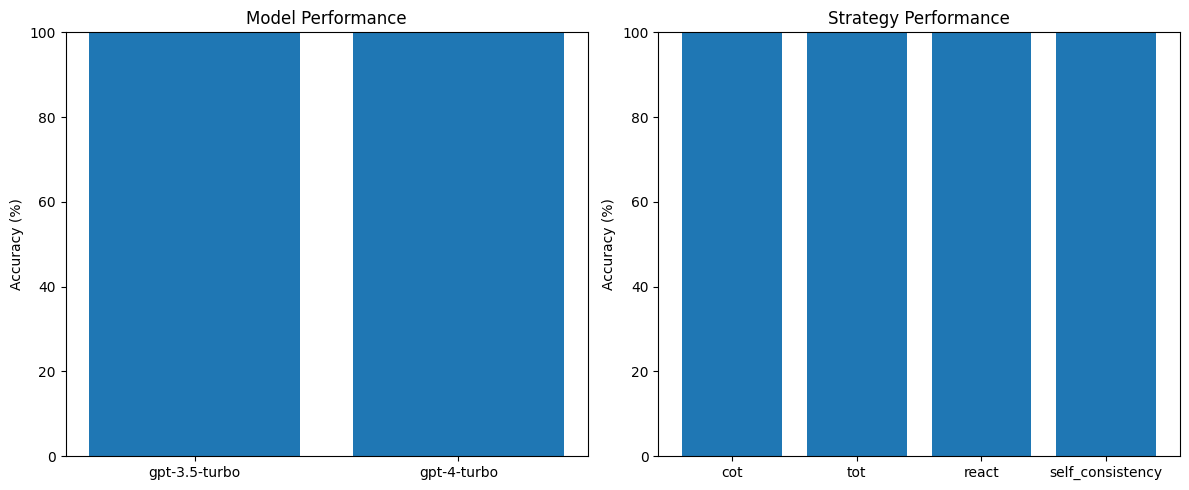

In [10]:
# ==========================
# ✋ Hands-On Code: Try Different Prompting Strategies and Models
# ==========================

# 📝 Instructions:
# - Change 'model_name' to try different models (e.g., "gpt-3.5-turbo", "gpt-4-turbo", "gpt-o3").
# - Adjust 'temperature' to test how creativity affects reasoning.
# - Try Self-Consistency by sampling multiple outputs and comparing answers.
# - Optionally, explore Tree-of-Thought and ReAct patterns by modifying prompts.
# ✅ Your Experiment Starts Here 👇

# ==========================
# 📌 Comparing Advanced Prompting Strategies for the Chickens and Rabbits Problem
# ==========================

# We'll test multiple models and strategies and compare results
models_to_test = ["gpt-3.5-turbo", "gpt-4-turbo"]  # Add "gpt-o3" if you have access

# Define the problem prompt
problem = (
    "A farmer has chickens and rabbits in a cage. There are 35 heads and 94 legs. "
    "How many chickens and rabbits are there?"
)

# -------------------------
# Chain-of-Thought (CoT) Prompt
# -------------------------
cot_prompt = (
    f"Problem: {problem}\n\n"
    "Let's solve this step by step:\n\n"
    "1) Let's define variables: Let c be the number of chickens and r be the number of rabbits.\n"
    "2) Write equations based on the given information.\n"
    "3) Solve the system of equations.\n"
    "4) Verify the answer."
)

# -------------------------
# Tree-of-Thought (ToT) Prompt
# -------------------------
tot_prompt = (
    f"Problem: {problem}\n\n"
    "Let's explore multiple solution paths and compare them to find the most reliable answer:\n\n"
    "Path 1: Algebraic Solution\n"
    "- Define variables for chickens and rabbits\n"
    "- Set up equations for heads and legs\n"
    "- Solve the system of equations\n\n"

    "Path 2: Trial and Error with Constraints\n"
    "- Total heads = 35, so possible combinations must sum to 35\n"
    "- For each combination, calculate total legs and check against 94\n"
    "- Find the combination that matches exactly\n\n"

    "Path 3: Working Backward from Legs\n"
    "- If all animals were chickens (2 legs each), we would have 70 legs\n"
    "- The extra legs (94 - 70 = 24) must come from rabbits having 2 more legs than chickens\n"
    "- Calculate how many rabbits based on extra legs\n\n"

    "Explore each path and determine which one leads to the correct answer. For each path, show your work, "
    "note any potential errors, and state your confidence in the result.\n\n"
    "Finally, compare the results from all paths and determine the final answer."
)

# -------------------------
# ReAct (Reasoning + Acting) Prompt
# -------------------------
react_prompt = (
    f"Problem: {problem}\n\n"
    "Solve this problem using the ReAct format (Reasoning + Acting). Follow this structured approach:\n\n"
    "Thought: [Describe your thinking about how to approach the problem]\n"
    "Action: [Define a specific step to take]\n"
    "Observation: [Note what you observe after taking that step]\n\n"

    "Continue this Thought-Action-Observation cycle until you solve the problem. "
    "Be explicit about each equation you write and each calculation you perform. "
    "If you make a mistake, acknowledge it and correct yourself in the next cycle."
)

# -------------------------
# Self-Consistency Implementation
# -------------------------
def run_self_consistency(prompt, num_attempts=5, temperature=0.7):
    answers = []
    responses = []

    for _ in range(num_attempts):
        response = client.chat.completions.create(
            model=model_name,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature  # Add randomness to explore different reasoning paths
        )

        full_response = response.choices[0].message.content.strip()
        responses.append(full_response)

        # Extract final answer - look for patterns like "answer is X chickens and Y rabbits"
        import re
        answer_match = re.search(r"(\d+)\s+chickens\s+and\s+(\d+)\s+rabbits", full_response, re.IGNORECASE)
        if answer_match:
            chickens, rabbits = int(answer_match.group(1)), int(answer_match.group(2))
            answers.append((chickens, rabbits))

    # Find most common answer
    from collections import Counter
    if answers:
        most_common_answer = Counter(answers).most_common(1)[0]
        return {
            "responses": responses,
            "answer_counts": Counter(answers),
            "most_common": most_common_answer
        }
    else:
        return {
            "responses": responses,
            "answer_counts": {},
            "most_common": None
        }

# -------------------------
# Result Storage
# -------------------------
results = {
    model: {
        "cot": None,
        "tot": None,
        "react": None,
        "self_consistency": None
    }
    for model in models_to_test
}

# -------------------------
# Run Experiments
# -------------------------
for model_name in models_to_test:
    print(f"\n\n{'='*50}")
    print(f"TESTING MODEL: {model_name}")
    print(f"{'='*50}")

    # Chain of Thought (Single attempt)
    print(f"Running Chain of Thought experiment with {model_name}...")
    response_cot = client.chat.completions.create(
        model=model_name,
        messages=[{"role": "user", "content": cot_prompt}],
        temperature=0.0
    )
    results[model_name]["cot"] = response_cot.choices[0].message.content.strip()

    # Tree of Thought (Single attempt)
    print(f"Running Tree of Thought experiment with {model_name}...")
    response_tot = client.chat.completions.create(
        model=model_name,
        messages=[{"role": "user", "content": tot_prompt}],
        temperature=0.7
    )
    results[model_name]["tot"] = response_tot.choices[0].message.content.strip()

    # ReAct (Single attempt)
    print(f"Running ReAct experiment with {model_name}...")
    response_react = client.chat.completions.create(
        model=model_name,
        messages=[{"role": "user", "content": react_prompt}],
        temperature=0.5
    )
    results[model_name]["react"] = response_react.choices[0].message.content.strip()

    # Self-Consistency (with CoT prompt)
    print(f"Running Self-Consistency experiment with {model_name}...")
    sc_results = run_self_consistency(cot_prompt, num_attempts=3, temperature=0.7)  # Reduced to 3 attempts to save tokens
    results[model_name]["self_consistency"] = sc_results

# -------------------------
# Analysis Helper Functions
# -------------------------
def extract_answer(text):
    """Extracts the chicken and rabbit counts from the response text."""
    import re
    answer_match = re.search(r"(\d+)\s+chickens\s+and\s+(\d+)\s+rabbits", text, re.IGNORECASE)
    if answer_match:
        return (int(answer_match.group(1)), int(answer_match.group(2)))
    return None

def is_correct(answer):
    """Checks if the extracted answer is correct (23 chickens and 12 rabbits)."""
    return answer == (23, 12)

def analyze_results(results):
    """Analyzes the results from all experiments and creates a summary."""
    summary = {}

    for model in results:
        summary[model] = {
            "cot": {"answer": extract_answer(results[model]["cot"]), "correct": False},
            "tot": {"answer": extract_answer(results[model]["tot"]), "correct": False},
            "react": {"answer": extract_answer(results[model]["react"]), "correct": False},
            "self_consistency": {"answer": None, "correct": False, "consistency": 0}
        }

        # Check correctness
        if summary[model]["cot"]["answer"]:
            summary[model]["cot"]["correct"] = is_correct(summary[model]["cot"]["answer"])

        if summary[model]["tot"]["answer"]:
            summary[model]["tot"]["correct"] = is_correct(summary[model]["tot"]["answer"])

        if summary[model]["react"]["answer"]:
            summary[model]["react"]["correct"] = is_correct(summary[model]["react"]["answer"])

        # Handle self-consistency
        sc_data = results[model]["self_consistency"]
        if sc_data["most_common"]:
            answer, count = sc_data["most_common"]
            total = sum(sc_data["answer_counts"].values())
            summary[model]["self_consistency"]["answer"] = answer
            summary[model]["self_consistency"]["correct"] = is_correct(answer)
            summary[model]["self_consistency"]["consistency"] = count / total

    return summary

# -------------------------
# Performance Analysis
# -------------------------
def analyze_performance(summary):
    """Generate performance metrics for each model and strategy."""

    metrics = {
        "model_performance": {},
        "strategy_performance": {
            "cot": {"correct": 0, "total": 0},
            "tot": {"correct": 0, "total": 0},
            "react": {"correct": 0, "total": 0},
            "self_consistency": {"correct": 0, "total": 0}
        },
        "overall_best": {"model": None, "strategy": None, "score": 0}
    }

    # Calculate model performance
    for model in summary:
        correct = 0
        total = 0

        for strategy in summary[model]:
            if summary[model][strategy]["correct"]:
                correct += 1
            total += 1

            # Update strategy performance
            if summary[model][strategy]["correct"]:
                metrics["strategy_performance"][strategy]["correct"] += 1
            metrics["strategy_performance"][strategy]["total"] += 1

        metrics["model_performance"][model] = {
            "correct": correct,
            "total": total,
            "accuracy": correct / total if total > 0 else 0
        }

        # Check if this is the best model so far
        if correct > metrics["overall_best"]["score"]:
            metrics["overall_best"]["model"] = model
            metrics["overall_best"]["score"] = correct

    # Calculate strategy performance percentages
    for strategy in metrics["strategy_performance"]:
        strategy_data = metrics["strategy_performance"][strategy]
        strategy_data["accuracy"] = strategy_data["correct"] / strategy_data["total"] if strategy_data["total"] > 0 else 0

        # Check if this is the best strategy so far
        if strategy_data["accuracy"] > metrics["overall_best"].get("strategy_score", 0):
            metrics["overall_best"]["strategy"] = strategy
            metrics["overall_best"]["strategy_score"] = strategy_data["accuracy"]

    return metrics

# Visualize results (optional - requires matplotlib)
def visualize_results(summary, metrics):
    """Create visualizations of the results."""
    try:
        import matplotlib.pyplot as plt
        import numpy as np

        # Set up the figure and axes
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Model performance bar chart
        models = list(metrics["model_performance"].keys())
        accuracies = [metrics["model_performance"][model]["accuracy"] * 100 for model in models]

        ax1.bar(models, accuracies)
        ax1.set_ylim(0, 100)
        ax1.set_ylabel("Accuracy (%)")
        ax1.set_title("Model Performance")

        # Strategy performance bar chart
        strategies = list(metrics["strategy_performance"].keys())
        strategy_accuracies = [metrics["strategy_performance"][strategy]["accuracy"] * 100 for strategy in strategies]

        ax2.bar(strategies, strategy_accuracies)
        ax2.set_ylim(0, 100)
        ax2.set_ylabel("Accuracy (%)")
        ax2.set_title("Strategy Performance")

        plt.tight_layout()
        plt.savefig("prompting_strategy_results.png")
        print("\nVisualization saved as 'prompting_strategy_results.png'")

    except ImportError:
        print("\nMatplotlib not available. Skipping visualization.")

# -------------------------
# Display Results
# -------------------------
print("\n\n" + "="*80)
print("RESULTS SUMMARY")
print("="*80)

summary = analyze_results(results)
performance = analyze_performance(summary)

# Create a comparison table
from tabulate import tabulate

table_data = []
headers = ["Model", "Strategy", "Answer", "Correct?", "Notes"]

for model in summary:
    for strategy in ["cot", "tot", "react", "self_consistency"]:
        result = summary[model][strategy]

        if strategy == "self_consistency":
            answer_str = f"{result['answer'][0]} chickens, {result['answer'][1]} rabbits" if result['answer'] else "No consistent answer"
            notes = f"Consistency: {result['consistency']*100:.1f}%" if result['answer'] else "N/A"
        else:
            answer_str = f"{result['answer'][0]} chickens, {result['answer'][1]} rabbits" if result['answer'] else "Couldn't extract answer"
            notes = ""

        table_data.append([
            model,
            strategy.upper(),
            answer_str,
            "✓" if result["correct"] else "✗",
            notes
        ])

print(tabulate(table_data, headers=headers, tablefmt="grid"))

# Print performance summary
print("\n" + "="*80)
print("PERFORMANCE SUMMARY")
print("="*80)

# Model performance
print("\nModel Performance:")
for model, perf in performance["model_performance"].items():
    print(f"- {model}: {perf['correct']}/{perf['total']} correct ({perf['accuracy']*100:.1f}%)")

# Strategy performance
print("\nStrategy Performance:")
for strategy, perf in performance["strategy_performance"].items():
    print(f"- {strategy.upper()}: {perf['correct']}/{perf['total']} correct ({perf['accuracy']*100:.1f}%)")

# Best overall
print(f"\nBest Model: {performance['overall_best']['model']}")
print(f"Best Strategy: {performance['overall_best']['strategy'].upper()}")

# Create visualization (optional)
try:
    visualize_results(summary, performance)
except Exception as e:
    print(f"\nVisualization error: {e}")

# -------------------------
# Print Detailed Results (Optional)
# -------------------------
print_details = False  # Set to True if you want to see the full responses

if print_details:
    for model in results:
        print(f"\n\n{'='*50}")
        print(f"DETAILED RESULTS FOR {model}")
        print(f"{'='*50}")

        print("\n🔹 Chain-of-Thought Response:\n" + "-" * 50)
        print(results[model]["cot"])

        print("\n🔹 Tree-of-Thought Response:\n" + "-" * 50)
        print(results[model]["tot"])

        print("\n🔹 ReAct Response:\n" + "-" * 50)
        print(results[model]["react"])

        print("\n🔹 Self-Consistency Results:\n" + "-" * 50)
        sc_results = results[model]["self_consistency"]
        if sc_results["most_common"]:
            answer, count = sc_results["most_common"]
            print(f"Most Common Answer: {answer[0]} chickens and {answer[1]} rabbits")
            print(f"This answer appeared {count} out of {len(sc_results['responses'])} times")

            print("\nAnswer Distribution:")
            for answer, count in sc_results["answer_counts"].items():
                print(f"- {answer[0]} chickens and {answer[1]} rabbits: {count} times")
        else:
            print("No consistent answers found")


In [17]:
# View full model responses for each strategy with temperature information
print_details = True  # Set to True to see the full responses from each model and strategy

if print_details:
    # First, define a helper function to show limited response text
    def show_truncated_response(text, max_length=1500):
        """Shows a truncated version of a response with ellipsis if too long"""
        if len(text) > max_length:
            return text[:max_length] + "...\n[Response truncated for readability]"
        return text

    # Define the temperature settings used for each strategy
    temperature_settings = {
        "cot": 0.0,
        "tot": 0.7,
        "react": 0.5,
        "self_consistency": 0.7
    }

    # Display model responses with temperature information
    for model in models_to_test:
        print(f"\n\n{'='*80}")
        print(f"DETAILED RESULTS FOR {model.upper()}")
        print(f"{'='*80}")

        print(f"\n🔹 Chain-of-Thought Response (Temperature: {temperature_settings['cot']}):\n" + "-" * 50)
        print(show_truncated_response(results[model]["cot"]))

        print(f"\n🔹 Tree-of-Thought Response (Temperature: {temperature_settings['tot']}):\n" + "-" * 50)
        print(show_truncated_response(results[model]["tot"]))

        print(f"\n🔹 ReAct Response (Temperature: {temperature_settings['react']}):\n" + "-" * 50)
        print(show_truncated_response(results[model]["react"]))

        # Self-Consistency Results
        print(f"\n\n{'='*80}")
        print(f"SELF-CONSISTENCY RESULTS FOR {model.upper()} (Temperature: {temperature_settings['self_consistency']})")
        print(f"{'='*80}")

        sc_results = results[model]["self_consistency"]
        if sc_results["most_common"]:
            answer, count = sc_results["most_common"]
            print(f"Most Common Answer: {answer[0]} chickens and {answer[1]} rabbits")
            print(f"This answer appeared {count} out of {len(sc_results['responses'])} times")

            print("\nAnswer Distribution:")
            for answer, count in sc_results["answer_counts"].items():
                print(f"- {answer[0]} chickens and {answer[1]} rabbits: {count} times")

            print("\nSample Response:")
            print(show_truncated_response(sc_results["responses"][0]))
        else:
            print("No consistent answers found")

    # Add a section summarizing temperature impact
    print(f"\n\n{'='*80}")
    print(f"TEMPERATURE SETTINGS SUMMARY")
    print(f"{'='*80}")
    print("The following temperature settings were used for each prompting strategy:")

    for strategy, temp in temperature_settings.items():
        print(f"- {strategy.upper()}: {temp}")

    print("\nImpact of Temperature Settings:")
    print("- Lower temperature (0.0) for Chain-of-Thought: More deterministic reasoning, consistent solution paths")
    print("- Higher temperature (0.7) for Tree-of-Thought: Encourages exploration of multiple solution paths")
    print("- Medium temperature (0.5) for ReAct: Balance between creativity and structure in reasoning steps")
    print("- Higher temperature (0.7) for Self-Consistency: Generates diverse reasoning attempts to find consensus")



DETAILED RESULTS FOR GPT-3.5-TURBO

🔹 Chain-of-Thought Response (Temperature: 0.0):
--------------------------------------------------
1) Let c be the number of chickens and r be the number of rabbits.

2) We know that:
- The total number of heads is 35: c + r = 35
- The total number of legs is 94: 2c + 4r = 94

3) Solve the system of equations:
From the first equation, we can express c in terms of r:
c = 35 - r

Substitute c in the second equation:
2(35 - r) + 4r = 94
70 - 2r + 4r = 94
2r = 24
r = 12

Now, substitute r back into c = 35 - r:
c = 35 - 12
c = 23

So, there are 23 chickens and 12 rabbits in the cage.

4) Verify the answer:
23 chickens have 23 * 2 = 46 legs
12 rabbits have 12 * 4 = 48 legs
Total legs = 46 + 48 = 94 legs

The total number of heads is 23 + 12 = 35

Therefore, the solution is correct.

🔹 Tree-of-Thought Response (Temperature: 0.7):
--------------------------------------------------
Path 1: Algebraic Solution

Let x be the number of chickens and y be the num

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; border-radius: 12px; text-align: center;">
    <h1 style="margin-bottom: 10px;">📌 Conclusion</h1>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4; margin-top: 20px;">
    <p style="font-size: 16px; line-height: 1.8;">
        In this hands-on exploration, different advanced prompting strategies were tested to solve reasoning-based challenges.
        Through experimenting with <strong>Chain-of-Thought (CoT)</strong>, <strong>Self-Consistency</strong>, and other methods,
        the following key insights were observed:
    </p>
    <ul style="font-size: 16px; line-height: 1.8;">
        <li>Advanced prompting techniques significantly improve model performance, especially on complex, multi-step problems.</li>
        <li>Changing the <strong>model type</strong> and <strong>temperature</strong> can drastically affect reasoning quality and creativity.</li>
        <li>Some strategies, like <strong>Self-Consistency</strong>, help reduce random errors by exploring multiple reasoning paths.</li>
        <li>For ambiguous or challenging problems, combining strategies (e.g., CoT + Self-Consistency) often leads to the most reliable results.</li>
    </ul>
</div>

<div style="background: #f5faff; padding: 20px; border-radius: 8px; border-left: 5px solid #0055d4; margin-top: 20px;">
    <p style="font-size: 16px; font-style: italic;">
        📖 <em>Remember: Prompt engineering is both an art and a science. The more you experiment, the better you understand how to guide LLMs effectively!</em>
    </p>
</div>

<div style="margin-top: 40px; text-align: center;">
    <h3 style="color: #001a70;">✍️ Final Reflection</h3>
</div>

<div style="background: #ffffff; padding: 20px; border-radius: 10px; border-left: 6px solid #0055d4;">
    <p style="font-size: 16px;">
        Reflection on Prompting Strategies Experiment

Through my experiment with the chickens and rabbits problem, I gained several key insights about the interplay between prompting strategies and model selection. I observed that while both GPT-3.5-Turbo and GPT-4-Turbo achieved perfect accuracy across all techniques, the reasoning patterns and explanation depth differed significantly between models when examining their detailed responses. I found particularly interesting how temperature settings affected the diversity of reasoning paths—with lower temperatures (0.0) producing deterministic solutions for CoT, while higher temperatures for ToT (0.7) encouraged exploration of multiple solution approaches without compromising accuracy for this well-defined problem. My results suggest that for straightforward mathematical problems, the base capability of the model may be more influential than the specific prompting technique employed, though I expect these differences would become more pronounced when tackling problems with higher ambiguity or complexity.
    </p>
</div>
